In [43]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [44]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Define the paths to your data
train_normal_path = 'chest_xray/train/NORMAL'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA'
test_normal_path = 'chest_xray/test/NORMAL'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA'

In [46]:
# Count the number of images in each class
num_train_normal = len(os.listdir(train_normal_path))
num_train_pneumonia = len(os.listdir(train_pneumonia_path))
num_test_normal = len(os.listdir(test_normal_path))
num_test_pneumonia = len(os.listdir(test_pneumonia_path))

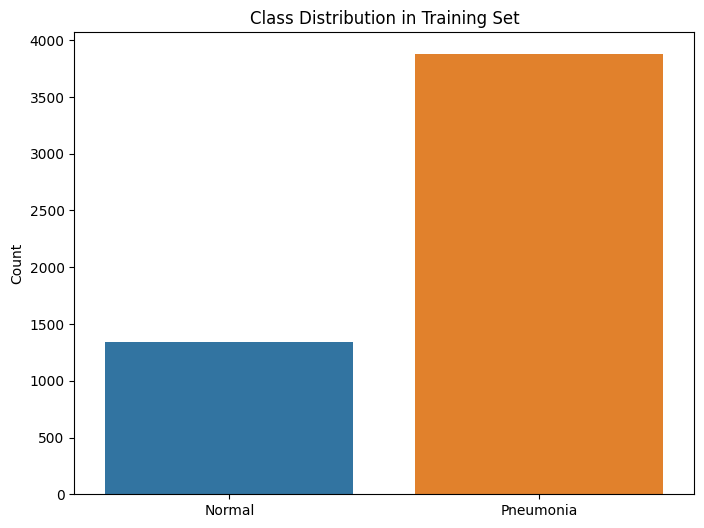

In [47]:
# Create a bar plot to visualize the class distribution
class_names = ['Normal', 'Pneumonia']
class_counts = [num_train_normal, num_train_pneumonia]
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Training Set')
plt.ylabel('Count')
plt.show()

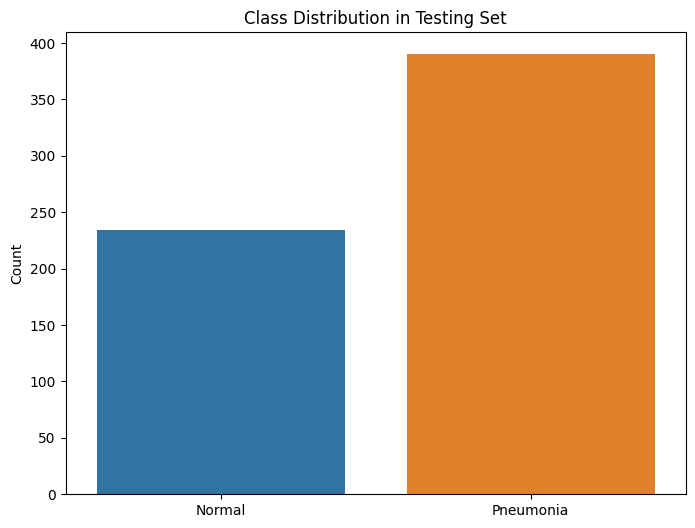

In [48]:
# Create a bar plot to visualize the class distribution
class_names = ['Normal', 'Pneumonia']
class_counts = [num_test_normal, num_test_pneumonia]
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Testing Set')
plt.ylabel('Count')
plt.show()

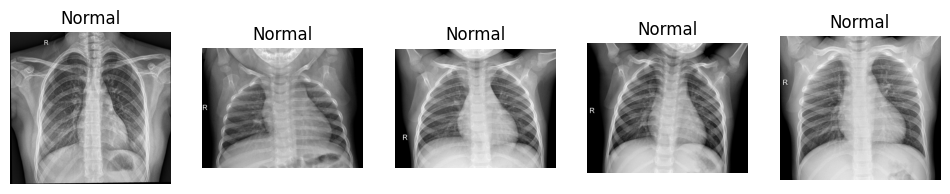

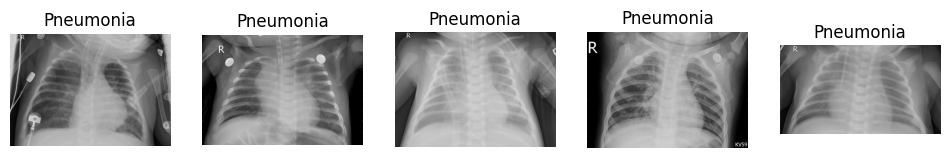

In [49]:
# Visualize a few sample images from each class
def plot_sample_images(image_path, title):
    plt.figure(figsize=(12, 6))
    for i in range(5):
        img = os.listdir(image_path)[i]
        img_path = os.path.join(image_path, img)
        plt.subplot(2, 5, i + 1)
        plt.imshow(plt.imread(img_path), cmap='gray')
        plt.title(title)
        plt.axis('off')

plot_sample_images(train_normal_path, 'Normal')
plot_sample_images(train_pneumonia_path, 'Pneumonia')
plt.show()

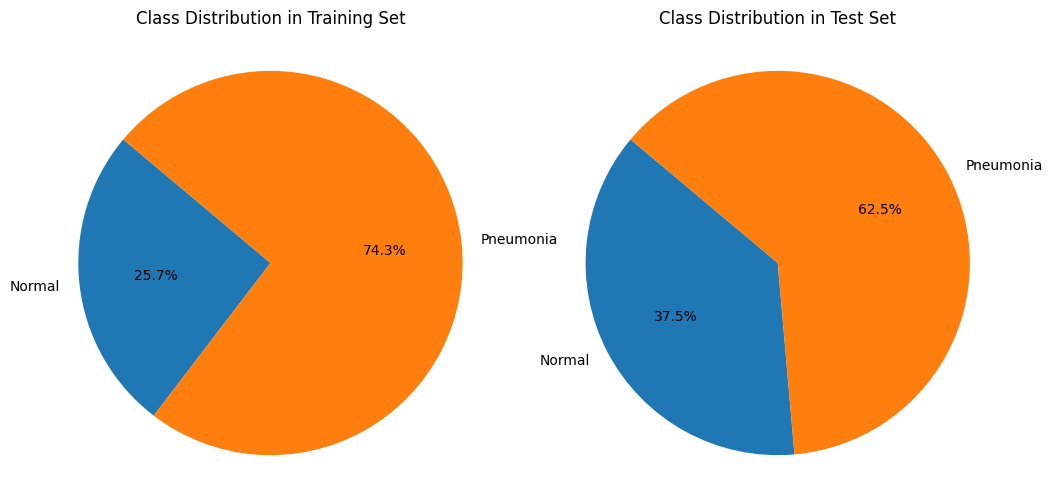

In [50]:
# Class distribution in the training set
class_names_train = ['Normal', 'Pneumonia']
class_counts_train = [num_train_normal, num_train_pneumonia]

# Class distribution in the test set
class_names_test = ['Normal', 'Pneumonia']
class_counts_test = [num_test_normal, num_test_pneumonia]

# Create a pie chart for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(class_counts_train, labels=class_names_train, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Class Distribution in Training Set')

# Create a pie chart for the test set
plt.subplot(1, 2, 2)
plt.pie(class_counts_test, labels=class_names_test, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Class Distribution in Test Set')

plt.show()

In [51]:
np.random.seed(42)
tf.random.set_seed(42)


In [52]:
IMAGE_SIZE = (224, 224)
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [53]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 35, 35, 64)       

In [54]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(256, activation='relu'))

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Add the output layer with two classes (change the number of units according to your task)
model.add(Dense(2, activation='softmax'))






#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(32, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(64, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(128, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(128, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Flatten())
#model.add(Dense(256, activation= 'relu'))
#model.add(Dense(512, activation= 'relu'))
#model.add(Dense(1, activation= 'sigmoid'))

In [55]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [56]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [57]:
training_set = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='categorical')
test_set = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [58]:
model.fit(
    training_set,
    validation_data=test_set,
    epochs=1,  # You can adjust the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


522/522 [==============================] - 85s 163ms/step - loss: 0.4039 - accuracy: 0.8280 - val_loss: 0.3752 - val_accuracy: 0.8397


In [59]:
from keras.preprocessing import image

img = image.load_img('chest_xray/test/PNEUMONIA/person1_virus_11.jpeg', target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


1/1 [==============================] - 0s 52ms/step
Person is Affected By PNEUMONIA


1/1 [==============================] - 0s 27ms/step


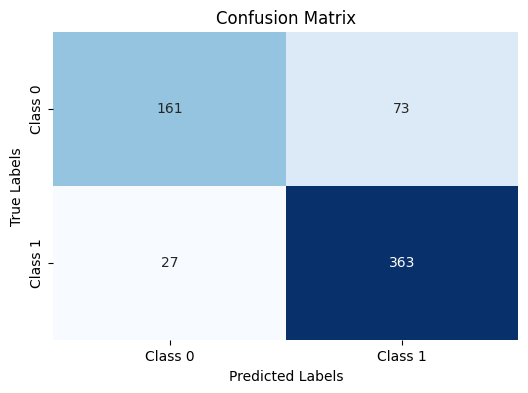

In [60]:
true_labels = []
predicted_labels = []

for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

t_labels = np.array(true_labels)
p_labels = np.array(predicted_labels)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.show()


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.8397435897435898
Precision : 0.8325688073394495
Recall    : 0.9307692307692308
F1-score  : 0.8789346246973365


In [62]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [63]:
# Set random seeds for reproducibility
import numpy as np
import random
import os

In [64]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '0'

In [65]:
# Data directories
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

# Image size
IMAGE_SIZE = (224, 224)

In [66]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15,  # Added rotation
    width_shift_range=0.1,  # Added width shift
    height_shift_range=0.1,  # Added height shift
    brightness_range=[0.8, 1.2]  # Added brightness adjustment
)

In [67]:
# No data augmentation for validation/test images
test_datagen = ImageDataGenerator(rescale=1./255)


In [68]:
# Load data
training_set = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [69]:
# Build a CNN model
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Added dropout
    Dense(1, activation='sigmoid')
])


In [70]:
# Compile the model with 'binary_crossentropy' loss and 'Adam' optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=9,  # You can adjust the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/9
163/163 [==============================] - 134s 820ms/step - loss: 0.3540 - accuracy: 0.8489 - val_loss: 1.0764 - val_accuracy: 0.3750
Epoch 2/9
163/163 [==============================] - 139s 853ms/step - loss: 0.2446 - accuracy: 0.9001 - val_loss: 3.1987 - val_accuracy: 0.3750
Epoch 3/9
163/163 [==============================] - 145s 886ms/step - loss: 0.2351 - accuracy: 0.8992 - val_loss: 5.6808 - val_accuracy: 0.3750
Epoch 4/9
163/163 [==============================] - 145s 886ms/step - loss: 0.2092 - accuracy: 0.9110 - val_loss: 0.4816 - val_accuracy: 0.7772
Epoch 5/9
163/163 [==============================] - 157s 959ms/step - loss: 0.1930 - accuracy: 0.9187 - val_loss: 0.2599 - val_accuracy: 0.8974
Epoch 6/9
163/163 [==============================] - 176s 1s/step - loss: 0.1999 - accuracy: 0.9181 - val_loss: 0.3239 - val_accuracy: 0.8718
Epoch 7/9
163/163 [==============================] - 178s 1s/step - loss: 0.1906 - accuracy: 0.9270 - val_loss: 0.2561 - val_accuracy

In [71]:
from keras.preprocessing import image

img = image.load_img('chest_xray/test/PNEUMONIA/person1_virus_11.jpeg', target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


1/1 [==============================] - 0s 97ms/step
Person is Affected By PNEUMONIA


In [72]:
true_labels = []
predicted_labels = []

for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    true_labels.extend(labels)  # Labels are already in the correct format (no need to use argmax)
    predicted_labels.extend(predictions)

# Convert true_labels and predicted_labels to numpy arrays
t_labels = np.array(true_labels)
p_labels = np.array(predicted_labels)

1/1 [==============================] - 0s 106ms/step


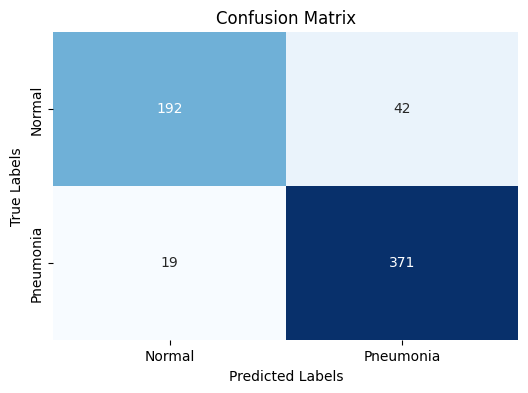

Accuracy: 0.9022435897435898


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert true_labels and predicted_labels to binary labels (0 or 1)
true_labels = np.array(true_labels)
predicted_labels = (np.array(predicted_labels) > 0.5).astype(int)  # Threshold at 0.5

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.yticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1_score = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8983050847457628
Recall: 0.9512820512820512
F1 Score: 0.9240348692403486


In [75]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [76]:
# Set random seeds for reproducibility
import numpy as np
import random
import os
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '0'

In [77]:
# Data directories
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [78]:
# Image size
IMAGE_SIZE = (224, 224)

In [79]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
)

In [80]:
# No data augmentation for validation/test images
test_datagen = ImageDataGenerator(rescale=1./255)


In [81]:
# Load data
training_set = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [82]:
# Build a CNN model with increased depth
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),  # Increased number of units in the fully connected layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [83]:
# Compile the model with 'binary_crossentropy' loss and 'Adam' optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [84]:
# Train the model with a higher number of epochs
model.fit(
    training_set,
    validation_data=test_set,
    epochs=13,  # Increase the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/13
163/163 [==============================] - 186s 1s/step - loss: 0.4177 - accuracy: 0.8368 - val_loss: 0.6153 - val_accuracy: 0.6250
Epoch 2/13
163/163 [==============================] - 159s 971ms/step - loss: 0.2976 - accuracy: 0.8932 - val_loss: 0.5260 - val_accuracy: 0.7468
Epoch 3/13
163/163 [==============================] - 177s 1s/step - loss: 0.2378 - accuracy: 0.9160 - val_loss: 0.4390 - val_accuracy: 0.8654
Epoch 4/13
163/163 [==============================] - 225s 1s/step - loss: 0.1971 - accuracy: 0.9294 - val_loss: 0.2964 - val_accuracy: 0.8974
Epoch 5/13
163/163 [==============================] - 215s 1s/step - loss: 0.1714 - accuracy: 0.9367 - val_loss: 0.3199 - val_accuracy: 0.8590
Epoch 6/13
163/163 [==============================] - 186s 1s/step - loss: 0.1700 - accuracy: 0.9360 - val_loss: 0.6703 - val_accuracy: 0.6442
Epoch 7/13
163/163 [==============================] - 188s 1s/step - loss: 0.1631 - accuracy: 0.9413 - val_loss: 1.4425 - val_accuracy: 0.6